<a href="https://colab.research.google.com/github/nitvishnoi/CNN_melanoma_detection_project/blob/main/Assignment_CNN_Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
In this assignment, yowe need to build a multiclass classification model using a custom convolutional neural network in TensorFlow. 

We need to build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

Actinic keratosis

Basal cell carcinoma

Dermatofibroma

Melanoma

Nevus

Pigmented benign keratosis

Seborrheic keratosis

Squamous cell carcinoma

Vascular lesion

 

### Importing Skin Cancer Data
#### Take necessary actions to read the data

### Step-1 : Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
# Define the path of train and test image
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Step-2 : Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Step-2A: Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split=0.2,
  subset='training',
  image_size=(img_height,img_width),
  batch_size=batch_size

)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Create a code to visualize one instance of all the nine classes present in the dataset

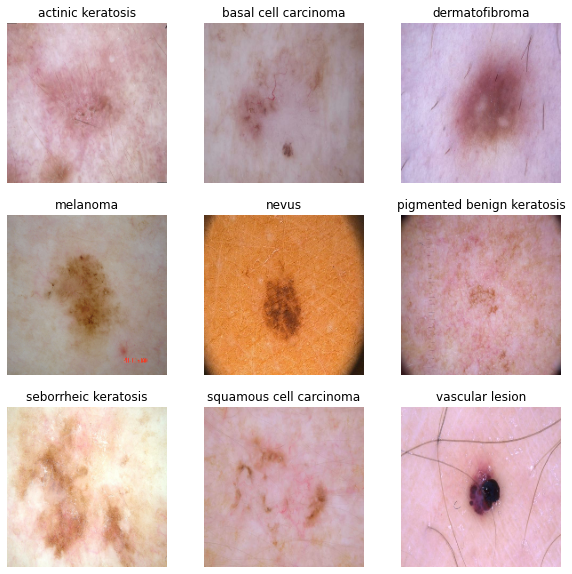

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    unique_set = train_ds.filter(lambda img, lbl: tf.math.equal(lbl[0],i))
    
    for images, labels in unique_set.take(1):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Step-3 :Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here

from keras.layers import Dense ,Dropout , Flatten ,Conv2D ,MaxPool2D
num_classes=9
model=Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,img_width,3))
                  ])
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',
                 activation='relu',input_shape=(180,180,32)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Step-4 Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
from tensorflow.keras.optimizers import RMSprop

In [13]:
### Todo, choose an appropirate optimiser and loss function
#model.compile(optimizer='your_optimser',
#              loss=your_loss_function_goes_here,
#              metrics=['accuracy'])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Step-5: Train the model for 20 epochs

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


281/281 [==============================] - 1051s 884ms/step - loss: 2.0452 - accuracy: 0.1975 - val_loss: 1.7490 - val_accuracy: 0.2635
Epoch 2/20
281/281 [==============================] - 22s 76ms/step - loss: 1.6384 - accuracy: 0.3645 - val_loss: 1.5878 - val_accuracy: 0.3881
Epoch 3/20
281/281 [==============================] - 21s 76ms/step - loss: 1.4039 - accuracy: 0.4778 - val_loss: 1.2658 - val_accuracy: 0.5229
Epoch 4/20
281/281 [==============================] - 21s 76ms/step - loss: 1.1470 - accuracy: 0.5850 - val_loss: 1.0868 - val_accuracy: 0.6168
Epoch 5/20
281/281 [==============================] - 21s 76ms/step - loss: 0.9638 - accuracy: 0.6559 - val_loss: 0.9152 - val_accuracy: 0.6907
Epoch 6/20
281/281 [==============================] - 21s 75ms/step - loss: 0.8191 - accuracy: 0.7107 - val_loss: 0.8753 - val_accuracy: 0.7112
Epoch 7/20
281/281 [==============================] - 21s 75ms/step - loss: 0.6866 - accuracy: 0.7618 - val_loss: 0.7483 - val_accuracy: 0.7503


### Step-6: Visualizing training results for 15 epochs

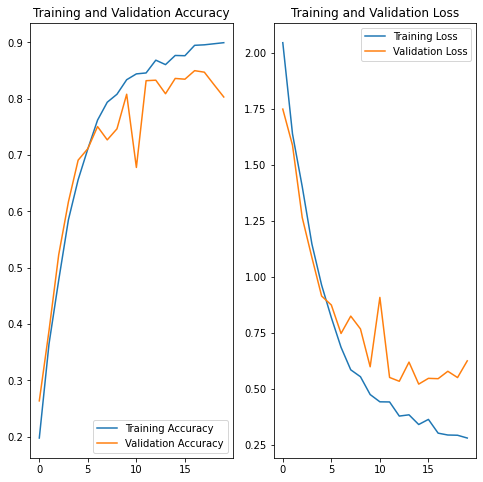

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

> <span style='color:green'>**Analysis for the first model:** Accuracy is came around 40-60% as there are enough features to remember the pattern, and the neural network is very initial stage with only 10 epochs, so the learning has just started</span>


> <span style='color:green'>Initial findings: The model is overfitting because overfitting is calculated w. r.t loss</span>


> <span style='color:green'>But again, it's too early to comment on the overfitting & underfitting debate</span>

### Step-7 visualize how your augmentation strategy works for one instance of training image.


In [17]:
data_aug=keras.Sequential([
                           layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                           layers.experimental.preprocessing.RandomRotation(0.2,fill_mode='reflect'),
                           layers.experimental.preprocessing.RandomZoom(height_factor=(0.2,0.3),width_factor=(0.2,0.3),fill_mode='reflect')])

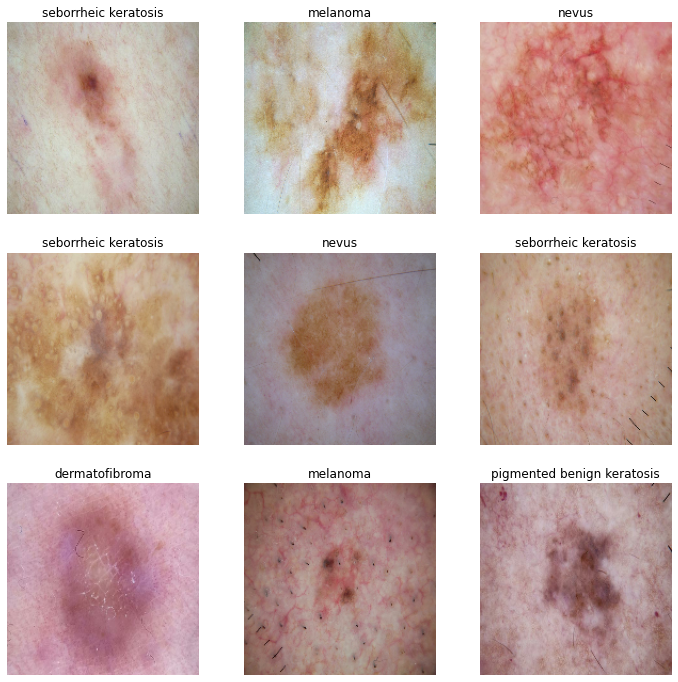

In [18]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Step-8: Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes herfrom keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Step-9 : Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Step10: Training the model for 20 epochs

In [21]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code
epochs=20
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


281/281 [==============================] - 23s 78ms/step - loss: 2.1949 - accuracy: 0.1258 - val_loss: 2.1914 - val_accuracy: 0.1282
Epoch 2/20
281/281 [==============================] - 22s 77ms/step - loss: 2.1930 - accuracy: 0.1267 - val_loss: 2.1905 - val_accuracy: 0.1282
Epoch 3/20
281/281 [==============================] - 22s 78ms/step - loss: 2.1956 - accuracy: 0.1290 - val_loss: 2.1899 - val_accuracy: 0.1282
Epoch 4/20
281/281 [==============================] - 22s 77ms/step - loss: 2.1924 - accuracy: 0.1302 - val_loss: 2.1898 - val_accuracy: 0.1286
Epoch 5/20
281/281 [==============================] - 22s 77ms/step - loss: 2.1910 - accuracy: 0.1276 - val_loss: 2.1891 - val_accuracy: 0.1317
Epoch 6/20
281/281 [==============================] - 22s 77ms/step - loss: 2.1896 - accuracy: 0.1257 - val_loss: 2.1912 - val_accuracy: 0.1313
Epoch 7/20
281/281 [==============================] - 22s 77ms/step - loss: 2.1897 - accuracy: 0.1282 - val_loss: 2.1917 - val_accuracy: 0.1268
Epo

### Step-11: Visualizing the results

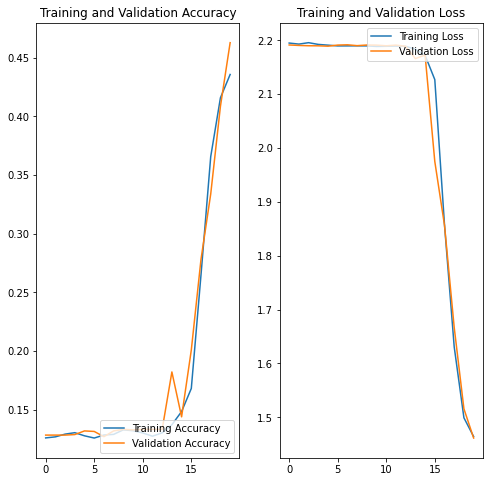

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

> <span style='color:green'>**Analysis for the second model:**</span>

> <span style='color:green'>We see accuracy got decreased a bit</span>

> <span style='color:green'>And we don't see any improvements with respect to accuracy from the earlier base model, but we can definitely see the overfitting issue fading away due to data augmentation</span>

> <span style='color:green'>But again, judging based on just 20 epochs won't give us proper conclusions</span>

#### Step-12: To Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

## Finding the distribution of classes in the training dataset

In [23]:
path_list=[]
lesion_list=[]
for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,actinic keratosis
1,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,actinic keratosis
2,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,actinic keratosis
3,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,actinic keratosis
4,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,vascular lesion
2235,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,vascular lesion
2236,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,vascular lesion
2237,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,vascular lesion


In [24]:
## Your code goes here.
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,actinic keratosis
1,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,actinic keratosis
2,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,actinic keratosis
3,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,actinic keratosis
4,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,vascular lesion
2235,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,vascular lesion
2236,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,vascular lesion
2237,/content/gdrive/MyDrive/Upgrad/Skin cancer ISI...,vascular lesion


<BarContainer object of 9 artists>

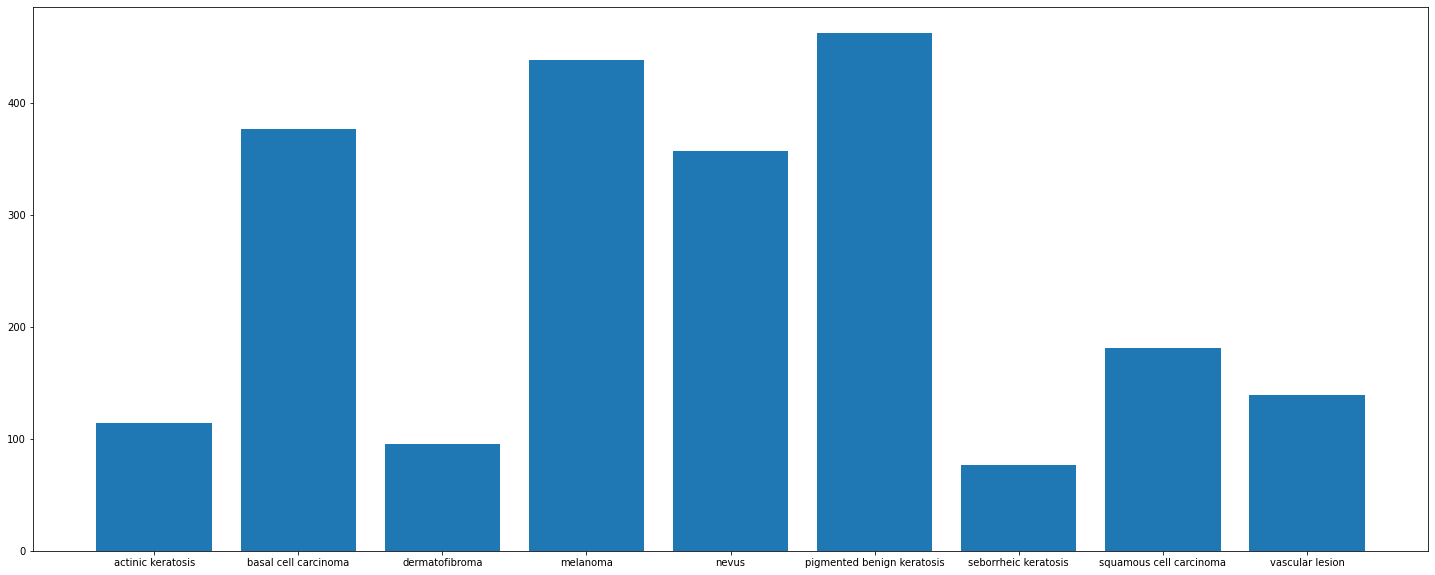

In [25]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


> <span style='color:green'>**Analysis:**</span>

> <span style='color:green'>As we can see above graph</span>

> <span style='color:green'>Seborrheic keratosis is having the lowest distribution</span>

> <span style='color:green'>Pigmented Benign keratosis is having the highest distribution of data</span>

### Visualize the model results

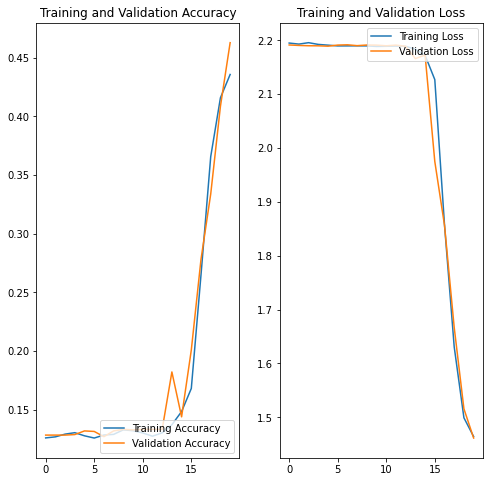

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Step-13:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
path_to_training_dataset="/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7FBA046510>: 100%|██████████| 500/500 [00:21<00:00, 23.43 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7FBA1CB2D0>: 100%|██████████| 500/500 [00:22<00:00, 22.66 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7FBA1BB310>: 100%|██████████| 500/500 [00:21<00:00, 23.16 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F7FBA39F210>: 100%|██████████| 500/500 [01:28<00:00,  5.65 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F7FBA1CB4D0>: 100%|██████████| 500/500 [01:33<00:00,  5.37 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7FB57AFED0>: 100%|██████████| 500/500 [00:18<00:00, 27.44 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F7FBA208CD0>: 100%|██████████| 500/500 [00:41<00:00, 11.97 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7FBA121790>: 100%|██████████| 500/500 [00:18<00:00, 26.42 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7FBA0F34D0>: 100%|██████████| 500/500 [00:18<00:00, 26.32 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029460.jpg_54108596-0d1d-4d9c-aa85-28052b78e719.jpg',
 '/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030242.jpg_2020652b-3bed-4da1-adc4-c428c5a2bb93.jpg',
 '/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031609.jpg_ba6356e4-9576-43d5-ab3a-27bf4237ba77.jpg',
 '/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027447.jpg_57b9a3c9-9153-4c65-8b1d-af6f2b9bcf95.jpg',
 '/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_orig

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [32]:
path_list_new=path_list
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [33]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [34]:
new_df['Label'].value_counts()

pigmented benign keratosis    1962
melanoma                      1938
basal cell carcinoma          1876
nevus                         1857
squamous cell carcinoma       1681
vascular lesion               1639
actinic keratosis             1614
dermatofibroma                1595
seborrheic keratosis          1577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Step-14**: Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [36]:
data_dir_train="/content/gdrive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


#### Create a validation dataset

In [37]:
## Todo choose the correct parameter value, so that only validation data is refered to,
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


#### **Step-15:** Create your model (make sure to include normalization)

In [38]:
## your code goes here

model = Sequential([
  data_aug,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.BatchNormalization(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  #layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

#### **Step-16:** Compile your model (Choose optimizer and loss function appropriately)

In [39]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Step-17:**  Train your model

In [40]:
#epochs = 30
## Your code goes here, use 50 epochs.
#history = # your model fit code
epochs=50
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


394/394 [==============================] - 85s 199ms/step - loss: 1.4954 - accuracy: 0.4611 - val_loss: 1.4949 - val_accuracy: 0.4554
Epoch 2/50
394/394 [==============================] - 72s 179ms/step - loss: 1.1699 - accuracy: 0.5546 - val_loss: 1.1981 - val_accuracy: 0.5580
Epoch 3/50
394/394 [==============================] - 66s 164ms/step - loss: 1.0327 - accuracy: 0.5995 - val_loss: 1.0182 - val_accuracy: 0.6120
Epoch 4/50
394/394 [==============================] - 65s 163ms/step - loss: 0.9323 - accuracy: 0.6404 - val_loss: 0.9876 - val_accuracy: 0.6323
Epoch 5/50
394/394 [==============================] - 65s 162ms/step - loss: 0.8612 - accuracy: 0.6712 - val_loss: 0.8559 - val_accuracy: 0.6629
Epoch 6/50
394/394 [==============================] - 65s 162ms/step - loss: 0.7950 - accuracy: 0.6900 - val_loss: 1.0528 - val_accuracy: 0.6212
Epoch 7/50
394/394 [==============================] - 65s 161ms/step - loss: 0.7201 - accuracy: 0.7205 - val_loss: 0.7759 - val_accuracy: 0.7

#### **Step-18:**  Visualize the model results

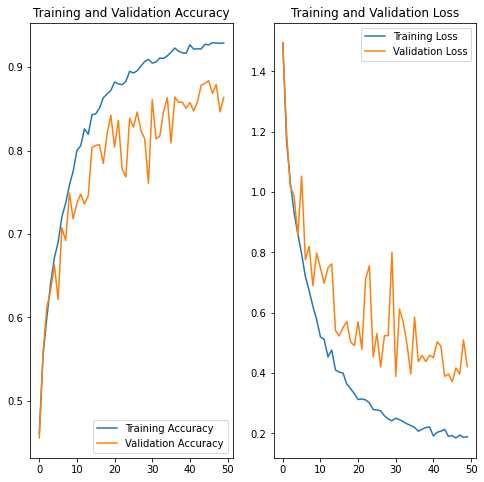

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



</span>

> <span style='color:green'>**Analysis for the final model:**</span>

> <span style='color:green'>**ACCURACY = 92.89%:**</span>


> <span style='color:green'>**VALIDATION ACCURACY = 86.37% :**</span>

> <span style='color:green'>**The model is not overfitting with this model and due to augmentation the accuracy has significantly increased**</span>

> <span style='color:green'>**As its important to balance out the data set so yes class rebalance helped here in this model**</span>